In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

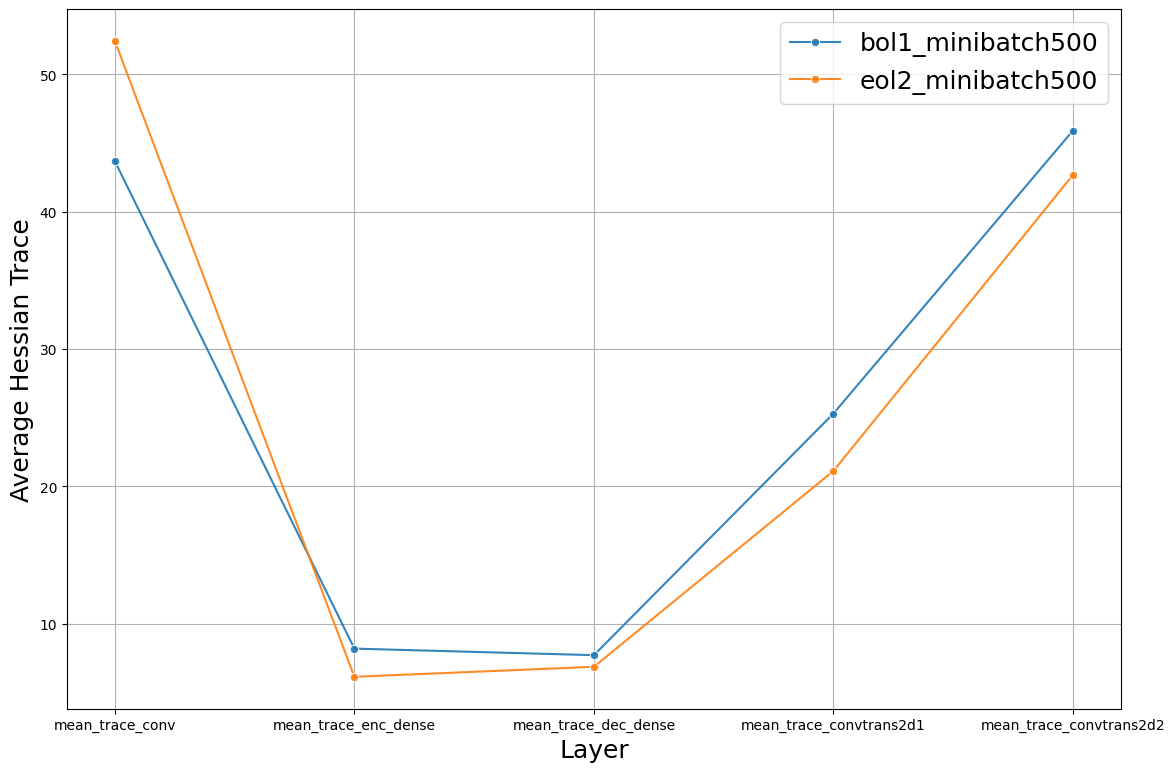

In [29]:
"""
Autoencoder PyHessian single batch
"""

df = pd.read_csv("./logs/autoencoder_mean_hessian_trace.csv")
fig, axs = plt.subplots(1, figsize=(12, 8))
fig.tight_layout()

for i in range(len(df.index)):
    if i == 1 or i == 5:
        mean_traces = []
        for layer in df.columns[1:]:
            mean_traces.append(df.iloc[i][layer])
        sns.lineplot(mean_traces, marker='o', label=df.iloc[i]["model"], alpha=0.9)

plt.xlabel("Layer", fontsize=18)
plt.ylabel("Average Hessian Trace", fontsize=18)
plt.xticks(list(range(len(df.columns[1:]))), df.columns[1:])
plt.grid()
plt.legend(fontsize=18)
# plt.yscale("log")
# plt.subplots_adjust(wspace=5, hspace=5)
plt.subplots_adjust(left=0.1, bottom=0.1)
plt.savefig("plots/worst-bol-vs-eol-autoencoder-pyhessian.png")